# Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Settings

In [2]:
sns.set(style = 'whitegrid', font_scale = 1.2)
path = os.path.join('assets', 'datasets')
os.chdir(path)

# Functions

In [3]:
def show_scatter_plot(df, x, y, hue=None, style=None):
    if style:
        df_sliced = df[ [x, y, hue, style] ]
    elif hue:
        df_sliced = df[ [x, y, hue] ]
    else:
        df_sliced = df[ [x, y] ]
    
    df_sliced = df_sliced.value_counts().reset_index()
    # ax = sns.relplot(data=df_sliced, x=x, y=y, hue=hue, style=style, size='count', sizes=(50, 300))
    ax = sns.scatterplot(data=df_sliced, x=x, y=y, hue=hue, style=style, size='count', sizes=(50, 300))
    
    return ax


def calculate_correlation(df, x, y, col_cat, slope=False):
    list_cat = df[col_cat].unique()
    
    for cat in list_cat:
        df_cat = df[ df[col_cat] == cat ]
        result = stats.linregress(df_cat[x], df_cat[y])
        
        if slope:
            str_res = f'{cat}: pearson index = {result.rvalue}, p value = {result.pvalue}, slope: {result.slope}'
        else:
            str_res = f'{cat}: pearson index = {result.rvalue}, p value = {result.pvalue}'
        print(str_res)

# Data description

In [4]:
df = pd.read_parquet('./Sleep_health_and_lifestyle_dataset_preprocessed.parquet')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


<Axes: >

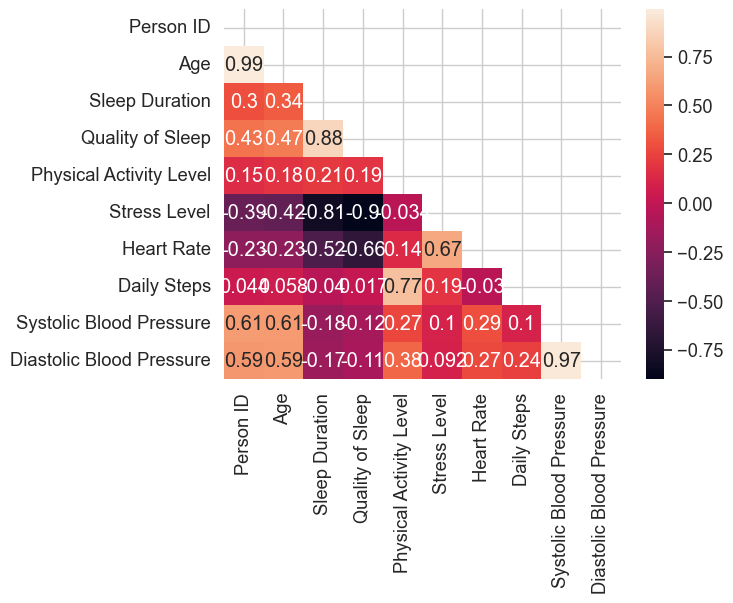

In [6]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask)

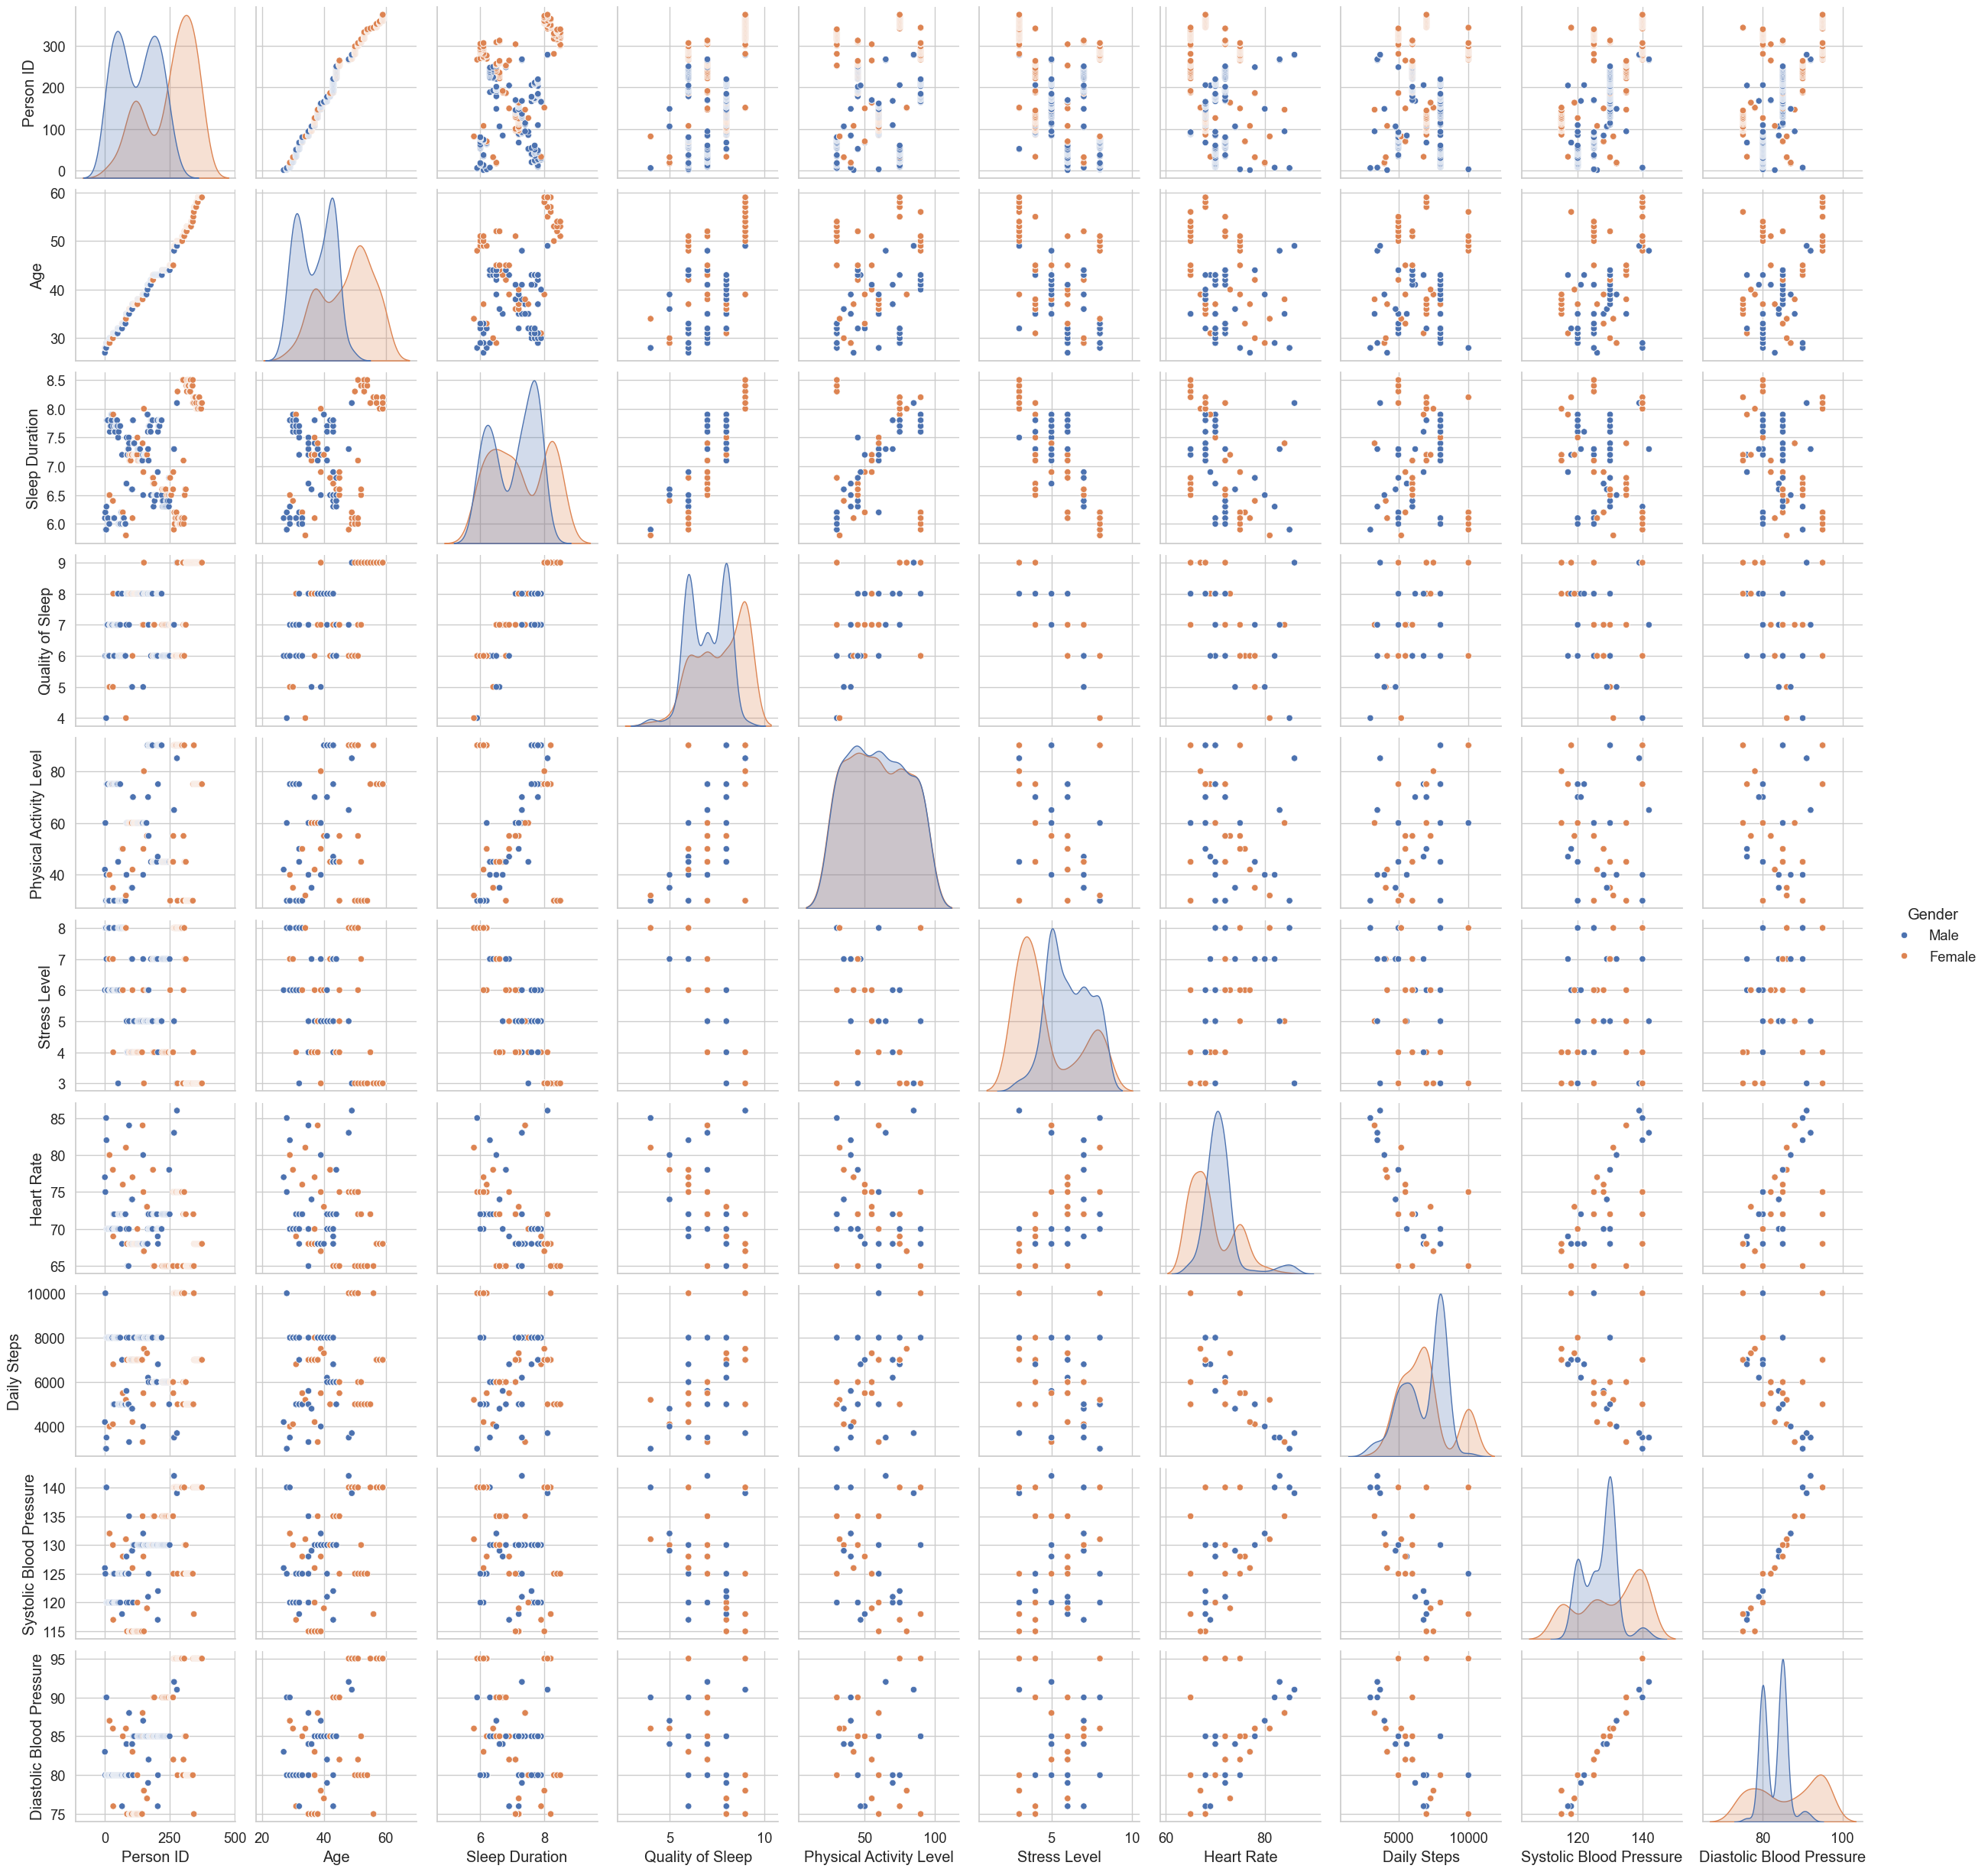

In [7]:
sns.pairplot(data=df, hue='Gender')

# EDA

## Who sleeps better, men or women?

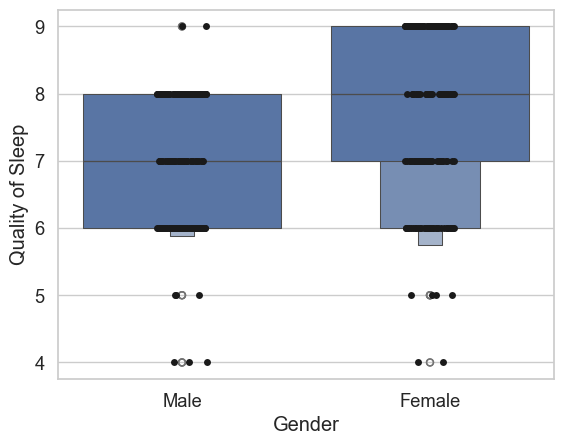

In [8]:
sns.boxenplot(data=df, x='Gender', y='Quality of Sleep')
sns.stripplot(data=df, x='Gender', y='Quality of Sleep', color='k');

## Is there a correlation between BMI and sleep quality?

<Axes: xlabel='Quality of Sleep'>

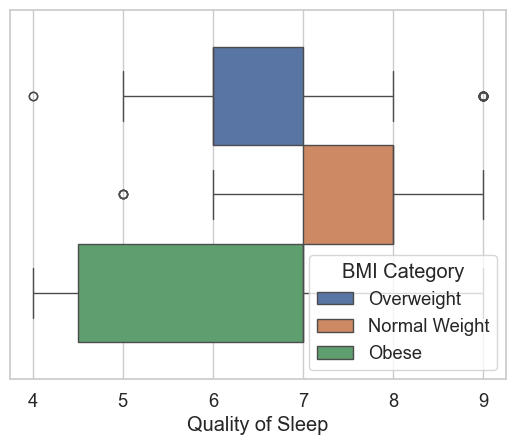

In [9]:
sns.boxplot(data=df, x='Quality of Sleep', hue='BMI Category')

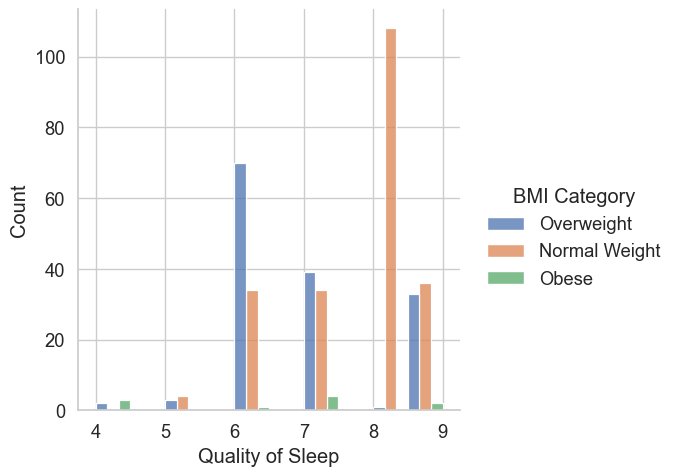

In [10]:
sns.displot(data=df, x='Quality of Sleep', hue='BMI Category', multiple='dodge')

## Is there a correlation between age and sleep quality?

In [11]:
calculate_correlation(df, 'Age', 'Quality of Sleep', 'BMI Category')

Overweight: pearson index = 0.7636331943527127, p value = 1.561991289943795e-29
Normal Weight: pearson index = 0.7987039676956265, p value = 4.2049536310631255e-49
Obese: pearson index = 0.8709673386173972, p value = 0.001034891319696467


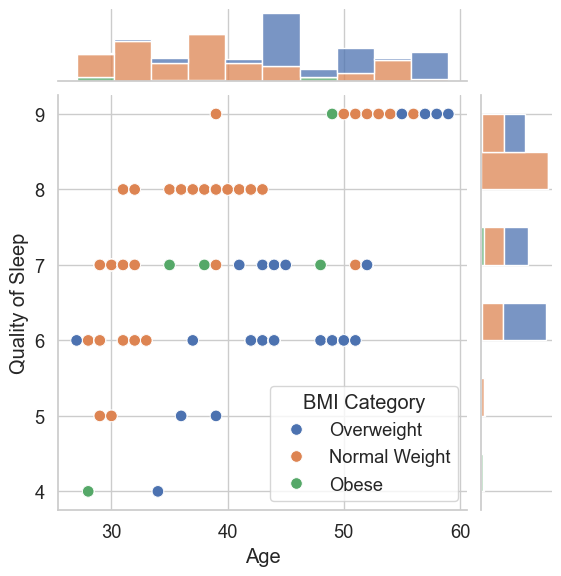

In [12]:
g = sns.JointGrid(df, x='Age', y='Quality of Sleep', hue='BMI Category')
g.plot_joint(sns.scatterplot, s=70)
# g.plot_marginals(sns.histplot, kde=True)
g.plot_marginals(sns.histplot, multiple="stack")

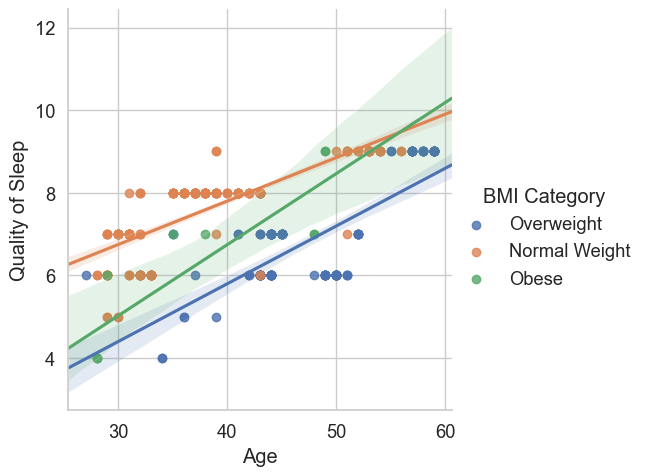

In [13]:
sns.lmplot(df, x='Age', y='Quality of Sleep', hue='BMI Category', truncate=False)

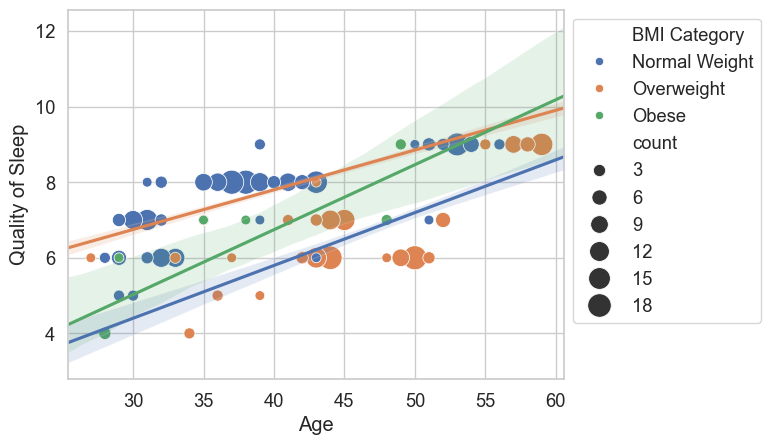

In [14]:
col = 'BMI Category'
ax = show_scatter_plot(df, 'Age', 'Quality of Sleep', 'BMI Category')

bmi_list = df[ col ].unique()
for bmi in bmi_list:
    m = df[ col ] == bmi
    sns.regplot(data=df[ m ], x="Age", y="Quality of Sleep", scatter=False, truncate=False, ax=ax)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

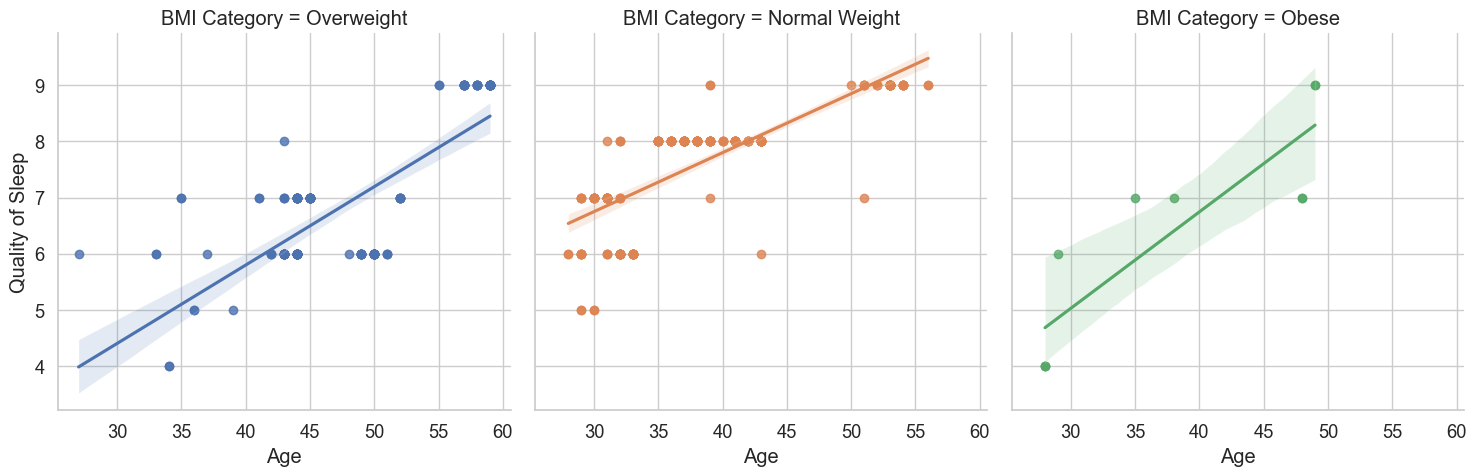

In [15]:
sns.lmplot(data=df, x='Age', y='Quality of Sleep',  hue='BMI Category', col='BMI Category', truncate=True)

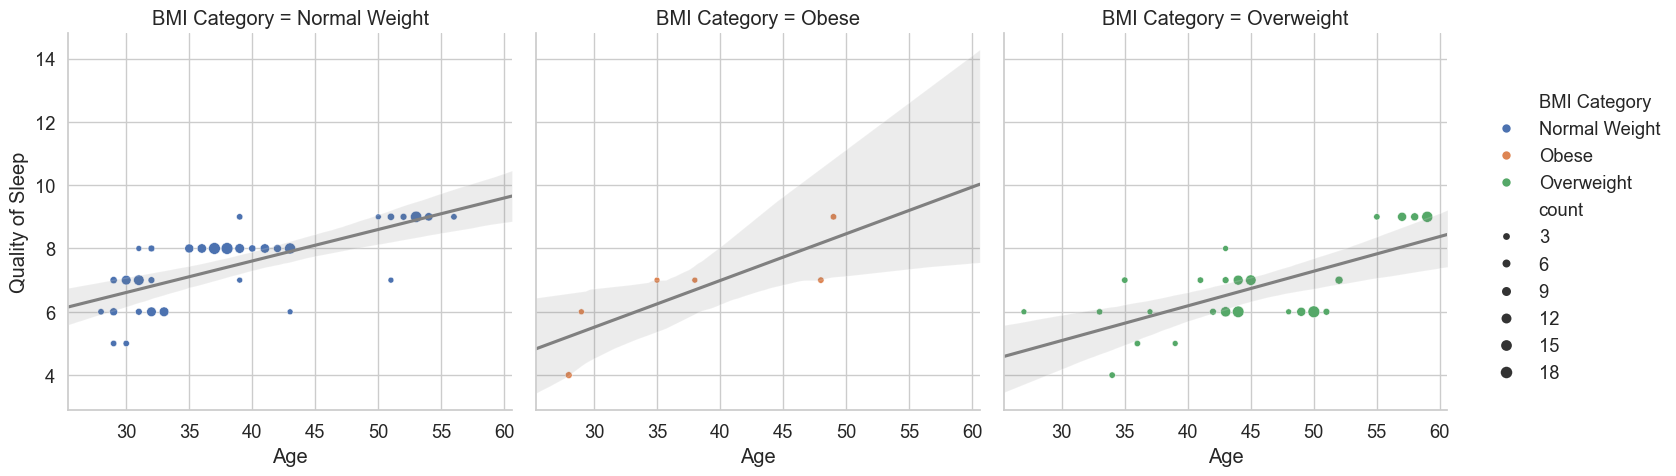

In [16]:
df_grouped = df.groupby('BMI Category')[ ['Age', 'Quality of Sleep'] ].value_counts()
df_filtered = df_grouped.reset_index()
g = sns.relplot(data=df_filtered, x='Age', y='Quality of Sleep', col='BMI Category', hue='BMI Category', size='count')
g.map_dataframe(sns.regplot, x='Age', y='Quality of Sleep', truncate=False, scatter=False, ax=g.axes, color = '0.5')

Si ha che IBM influisca sulla qualità del sonno:
- persone overweight peresentano una qualità del sonno piu bassa rispetto alle persone con IBM normale.
- Tendenzialmente persone obese presentano una qualità del sonno bassa.

Inoltre:
- Si può notare che ci sono persone obese con una qualità del sonno molto alta.
- Persone al di sotto dei 30 hanno una scarsa qualità del sonno
- perosne al di sopra dei 50 hanno una buona qualità del sonno
- all'aumentare dell'età c'è un miglioramento della qualità del sonno

Come mai se l'BMI sembrerebbe infuenzare la qualità del sonno ci sono persone obese che una qualità del sonno elevata?

## Why there are people obese with high quality of sleep? Let's examine the people obese with high sleep quality

In [17]:
m_obese = df['BMI Category'] == 'Obese'
m_quality_sleep = df['Quality of Sleep'] >= 7

df_obese = df[ m_obese & m_quality_sleep ]
df_obese.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,221.166667,44.500000,7.600000,7.666667,70.00000,4.333333,84.333333,3500.000000,138.666667,90.333333
std,80.238187,6.284903,0.389872,1.032796,11.83216,1.032796,1.366260,178.885438,3.141125,1.861899
min,94.000000,35.000000,7.300000,7.000000,60.00000,3.000000,83.000000,3300.000000,135.000000,88.000000
25%,175.750000,40.500000,7.325000,7.000000,61.25000,3.500000,83.250000,3350.000000,136.000000,88.750000
50%,266.000000,48.000000,7.400000,7.000000,65.00000,5.000000,84.000000,3500.000000,139.000000,91.000000
75%,274.500000,48.750000,7.925000,8.500000,80.00000,5.000000,85.500000,3650.000000,141.250000,91.750000
max,278.000000,49.000000,8.100000,9.000000,85.00000,5.000000,86.000000,3700.000000,142.000000,92.000000


### Probably are female?

<Axes: xlabel='Gender', ylabel='count'>

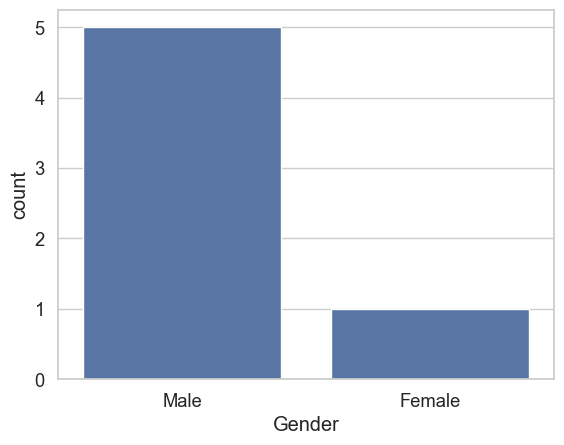

In [18]:
sns.countplot(data=df_obese, x='Gender')

In [19]:
df_obese.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,221.166667,44.500000,7.600000,7.666667,70.00000,4.333333,84.333333,3500.000000,138.666667,90.333333
std,80.238187,6.284903,0.389872,1.032796,11.83216,1.032796,1.366260,178.885438,3.141125,1.861899
min,94.000000,35.000000,7.300000,7.000000,60.00000,3.000000,83.000000,3300.000000,135.000000,88.000000
25%,175.750000,40.500000,7.325000,7.000000,61.25000,3.500000,83.250000,3350.000000,136.000000,88.750000
50%,266.000000,48.000000,7.400000,7.000000,65.00000,5.000000,84.000000,3500.000000,139.000000,91.000000
75%,274.500000,48.750000,7.925000,8.500000,80.00000,5.000000,85.500000,3650.000000,141.250000,91.750000
max,278.000000,49.000000,8.100000,9.000000,85.00000,5.000000,86.000000,3700.000000,142.000000,92.000000


### Is there a correlation between sleep quality and sleep duration?

<Axes: xlabel='Quality of Sleep', ylabel='Sleep Duration'>

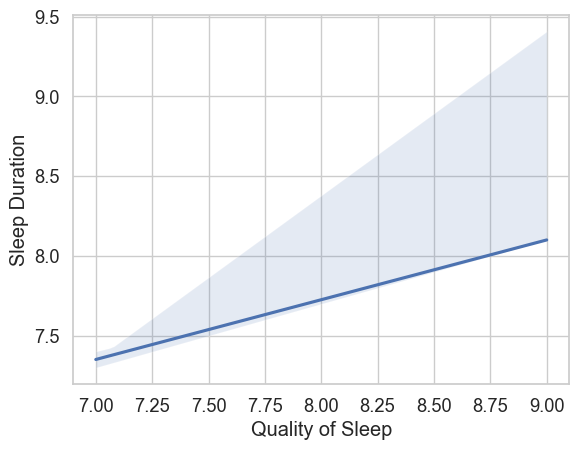

In [20]:
sns.regplot(data=df_obese, x='Quality of Sleep', y='Sleep Duration', scatter=False)

### Is there a correlation between sleep quality and sleep duration?

<Axes: xlabel='Quality of Sleep', ylabel='Physical Activity Level'>

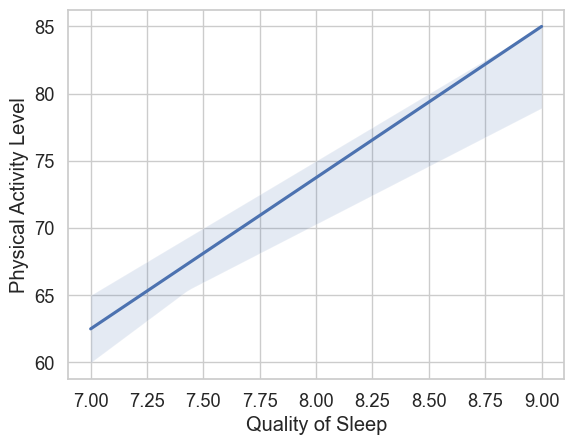

In [21]:
sns.regplot(data=df_obese, x='Quality of Sleep', y='Physical Activity Level', scatter=False)

### Is there a correlation between sleep quality and stress level?

<Axes: xlabel='Quality of Sleep', ylabel='Stress Level'>

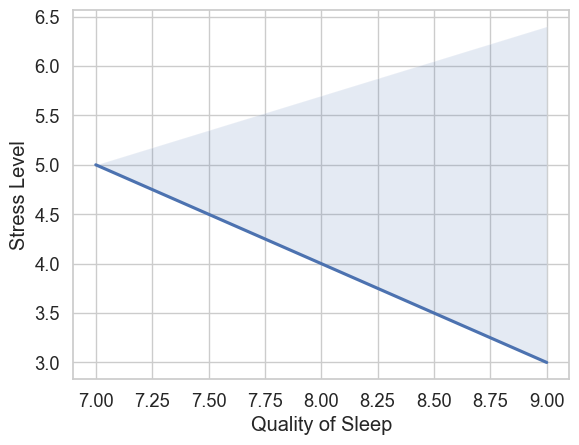

In [22]:
sns.regplot(data=df_obese, x='Quality of Sleep', y='Stress Level', scatter=False)

## Let's consider these conclusion to the entire dataset population

### Is there a correlation between sleep quality and sleep duration?

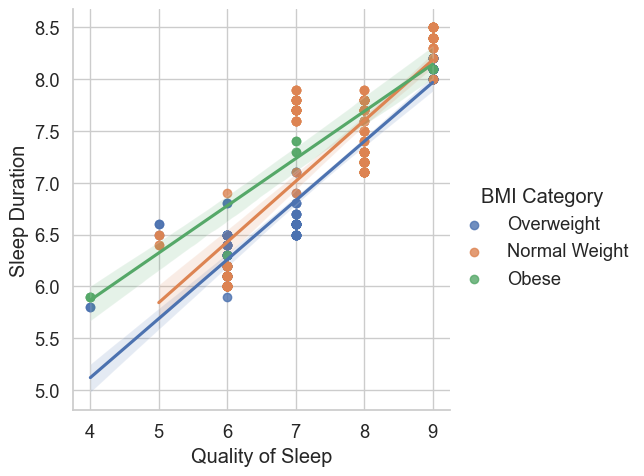

In [23]:
sns.lmplot(data=df, x='Quality of Sleep', y='Sleep Duration', hue='BMI Category')

In [24]:
x = df['Quality of Sleep']
y = df['Sleep Duration']

slope, intercept, pearson_corr_coeff, p_value, std_err = stats.linregress(x, y)

def correlation_func(x):
  return slope * x + intercept

model = list(map(correlation_func, x))


calculate_correlation(df, 'Quality of Sleep', 'Sleep Duration', 'BMI Category')

Overweight: pearson index = 0.9439986866660762, p value = 3.44322911765275e-72
Normal Weight: pearson index = 0.8134575670284538, p value = 2.873212162938578e-52
Obese: pearson index = 0.9784116178018625, p value = 9.25897377773874e-07


**slip duration is up to 9 hours. Doctors say that sleep duration more than 9 is unhealthy**

### Is there a correlation between quality of sleep and physical activity level?

Overweight: pearson index = 0.2562816305095015, p value = 0.0016662943866820336, slope: 4.050234974751169
Normal Weight: pearson index = 0.14601964487220473, p value = 0.0319448504281743, slope: 3.138087815016874
Obese: pearson index = 0.981761387347632, p value = 4.7359622783288996e-07, slope: 11.11111111111111


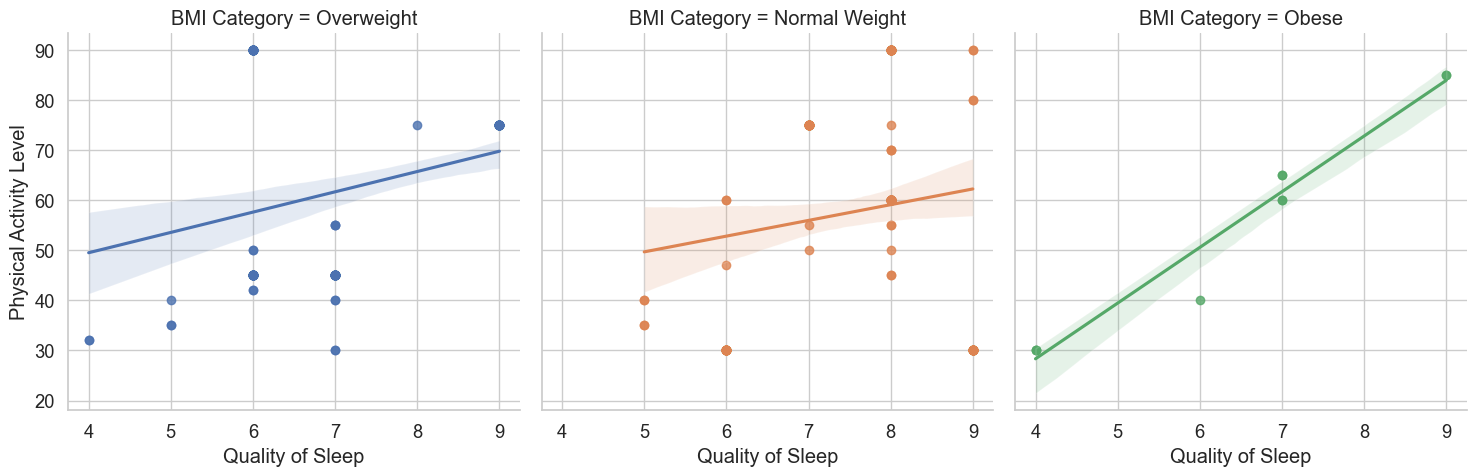

In [25]:
sns.lmplot(data=df, x='Quality of Sleep', y='Physical Activity Level', hue='BMI Category', col='BMI Category')
calculate_correlation(df, 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', slope=True)

Si ha che l'attivita fisica aiuta maggiormente coloro che presentano un IBM peggiore

### Is there a correlation between sleep quality and stress level?

Overweight: pearson index = -0.8753419200890716, p value = 6.286613792027736e-48
Normal Weight: pearson index = -0.9417597452721999, p value = 3.004947878633058e-103
Obese: pearson index = -0.9867886579568518, p value = 1.3117888780086285e-07


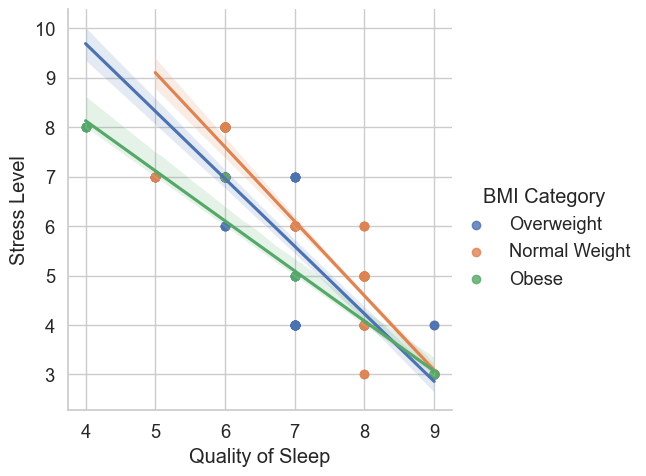

In [26]:
sns.lmplot(data=df, x='Quality of Sleep', y='Stress Level', hue='BMI Category')
calculate_correlation(df, 'Quality of Sleep', 'Stress Level', 'BMI Category')

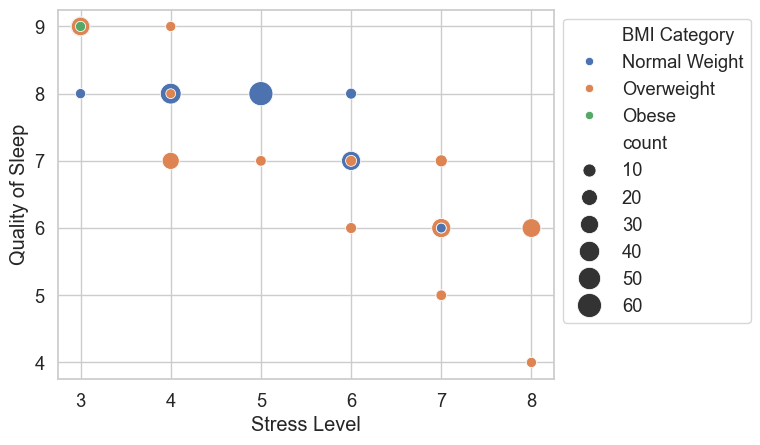

In [27]:
ax = show_scatter_plot(df, 'Stress Level', 'Quality of Sleep', 'BMI Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Correlation between stress level, sleep duration and BMI

Overweight: pearson index = -0.8392733129459251, p value = 1.8092336759582431e-40
Normal Weight: pearson index = -0.7966018356549004, p value = 1.1306107709628246e-48
Obese: pearson index = -0.9963569000740307, p value = 7.672952484881803e-10


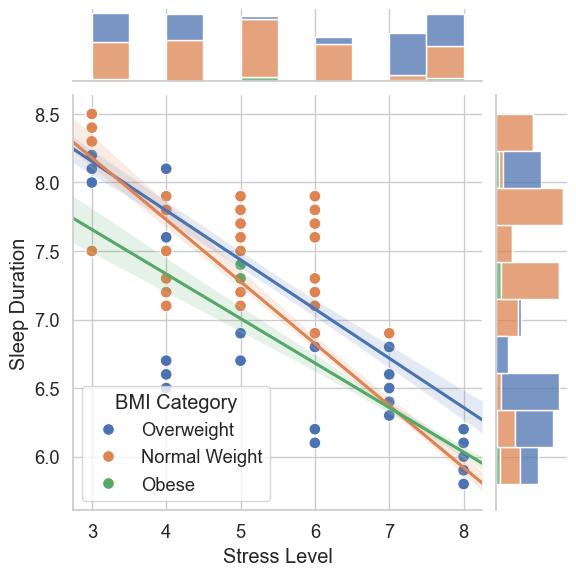

In [28]:
x, y, hue = 'Stress Level', 'Sleep Duration', 'BMI Category'
g = sns.JointGrid(df, x=x, y=y, hue=hue)
j_ax = g.plot_joint(sns.scatterplot, s=70)
g.plot_marginals(sns.histplot, multiple='stack')
for _, df_bmi in df.groupby(hue):
    sns.regplot(data=df_bmi, x=x, y=y, scatter=False, ax=j_ax.ax_joint, truncate=False)

calculate_correlation(df, x, y, hue)

## Correlation between stress and BMI?

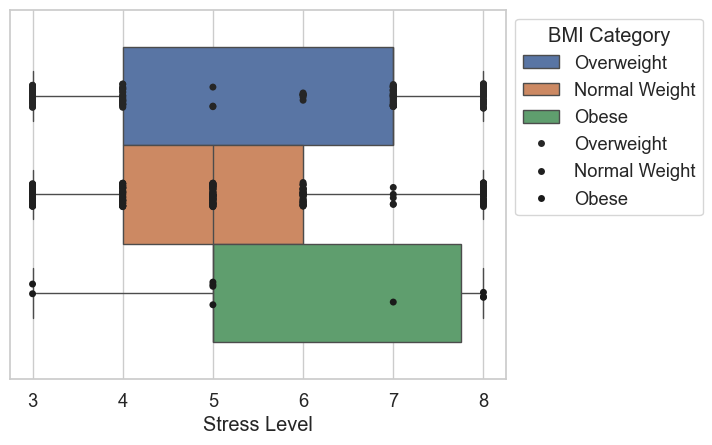

In [29]:
ax = sns.boxplot(data=df, x='Stress Level', hue='BMI Category')
sns.stripplot(data=df, x='Stress Level', hue='BMI Category', palette='dark:k', dodge=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

**Potrebbe esserci casualità tra stress e BMI ma risulta essere riscontrata dopo un certo lasso di tempo**

## Is it true that there is a correlation between sleep quality and age?

Overweight: pearson index = 0.6877221562207692, p value = 4.708369738033912e-22
Normal Weight: pearson index = 0.6808805468277321, p value = 9.04279102721715e-31
Obese: pearson index = 0.8934428735649457, p value = 0.0004950683470050124


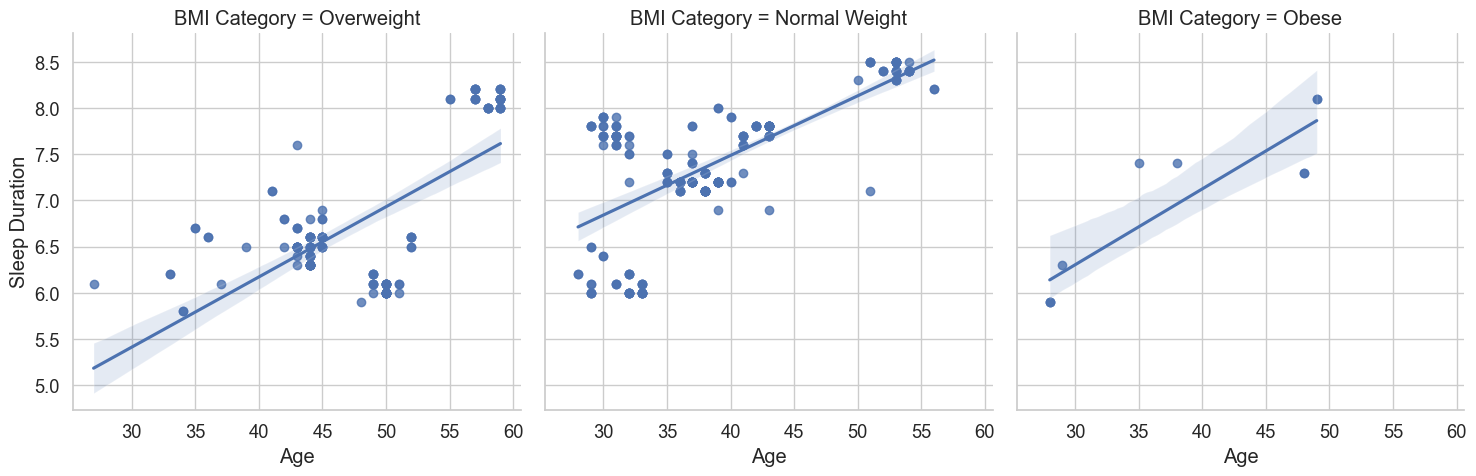

In [30]:
sns.lmplot(data=df, x='Age', y='Sleep Duration', col='BMI Category')
calculate_correlation(df, 'Age', 'Sleep Duration', 'BMI Category')

## Is it true that there is a correlation between stress level and age?

Overweight: pearson index = -0.44210455646243757, p value = 1.8504088813549834e-08
Normal Weight: pearson index = -0.7241359332478134, p value = 2.1985218051599622e-36
Obese: pearson index = -0.9024117371683512, p value = 0.0003521928462137899


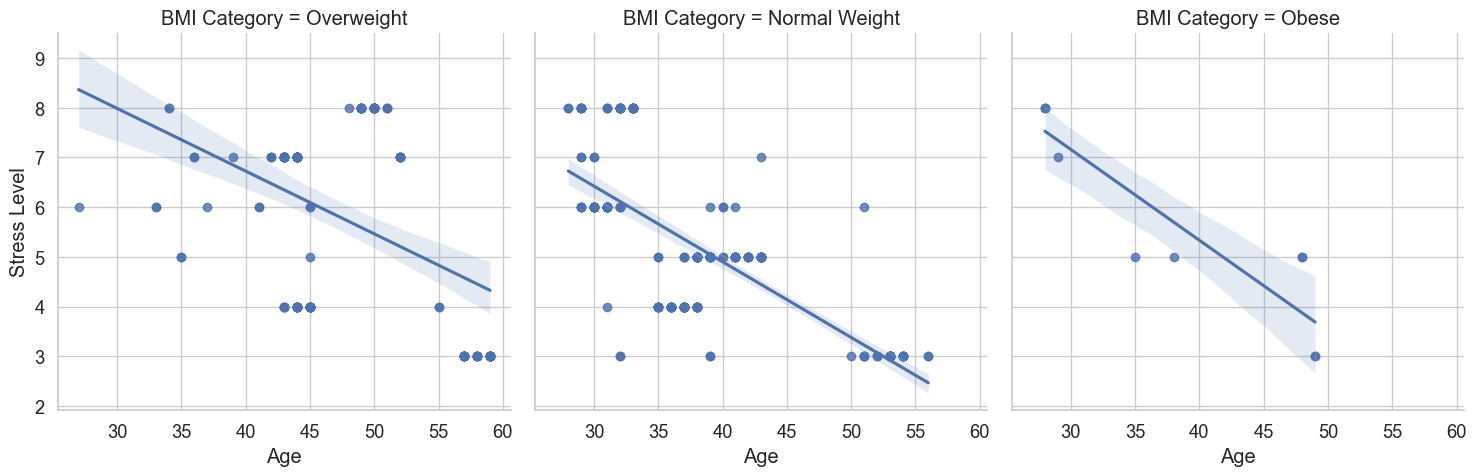

In [31]:
sns.lmplot(data=df, x='Age', y='Stress Level', col='BMI Category')
calculate_correlation(df, 'Age', 'Stress Level', 'BMI Category')

## Can we do something to reduce stress?

### Work

<Axes: xlabel='Stress Level', ylabel='Occupation'>

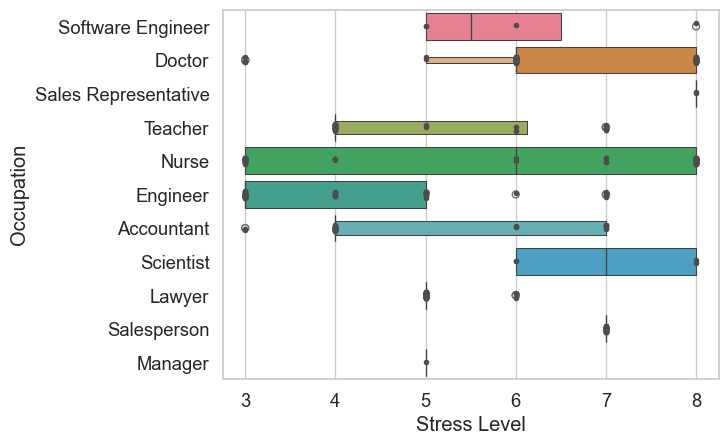

In [32]:
sns.boxenplot(data=df, x='Stress Level', y='Occupation', hue='Occupation')
sns.stripplot(data=df, x='Stress Level', y='Occupation', size=4, color=".3")

### Physical activity

Overweight: pearson index = 0.08455016249738881, p value = 0.30691983314773574
Normal Weight: pearson index = -0.10038162461011974, p value = 0.14143755095401392
Obese: pearson index = -0.9968504973351725, p value = 4.288482632446817e-10


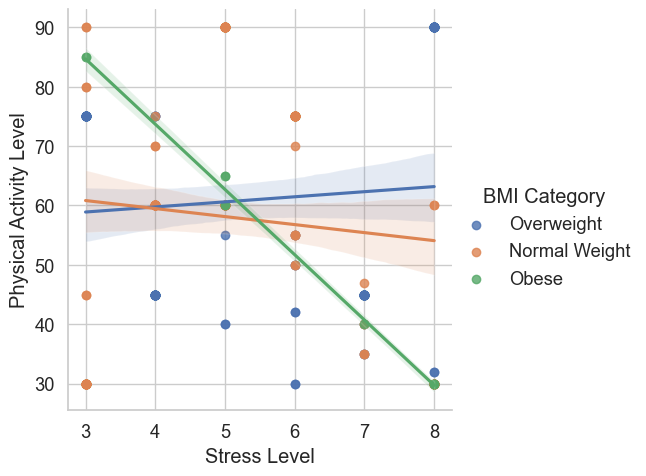

In [33]:
sns.lmplot(data=df, x='Stress Level', y='Physical Activity Level', hue='BMI Category')
calculate_correlation(df, 'Stress Level', 'Physical Activity Level', 'BMI Category')

### Daily steps

Overweight: pearson index = 0.39736675990822634, p value = 5.713562835878644e-07
Normal Weight: pearson index = 0.03346890890534001, p value = 0.6247189546551682
Obese: pearson index = -0.8793594899535915, p value = 0.0007991916214686431


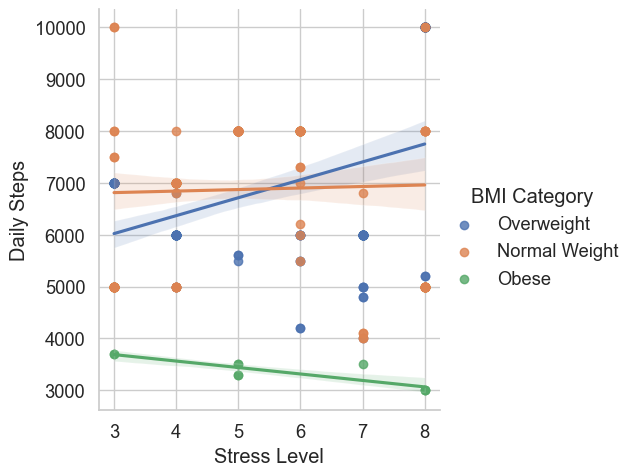

In [34]:
sns.lmplot(data=df, x='Stress Level', y='Daily Steps', hue='BMI Category')
calculate_correlation(df, 'Stress Level', 'Daily Steps', 'BMI Category')

## What can we say about sleep disorders?

### How can sleep disorders influence quality of sleep?

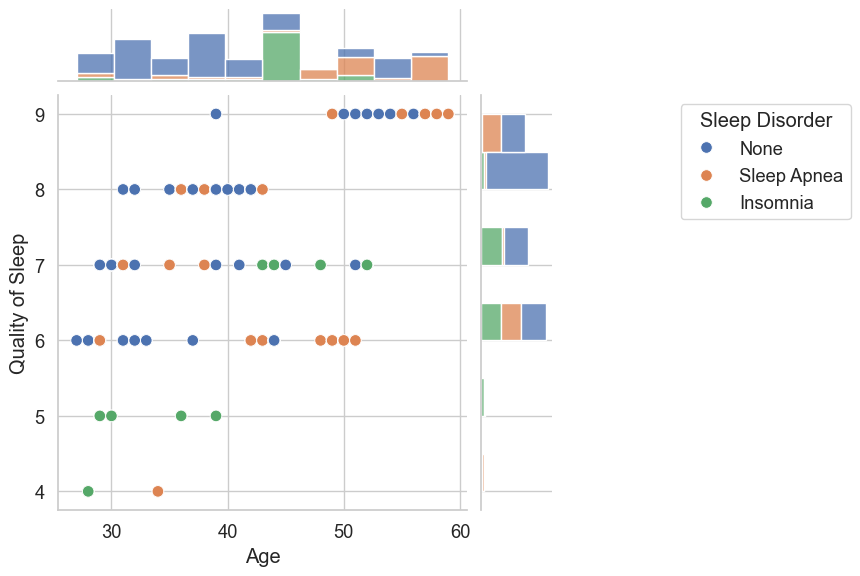

In [35]:
g = sns.JointGrid(df, x='Age', y='Quality of Sleep', hue='Sleep Disorder')
g.plot_joint(sns.scatterplot, s=70)
g.plot_marginals(sns.histplot, multiple='stack')
sns.move_legend(g.ax_joint.axes, "upper left", bbox_to_anchor=(1.5, 1))

## Review

- persone con BMI normale e nessun sleep disorder presentano una qualita del sonno elevata
- IBM normale e overweight non ci sia molta differenza
- sleep apnea e nessun sleep disorder non ci sia molta differenza sulla qualita del sonno
- persone obese e insomnia influiscono molto sulla qualità del sonno

## Let's consider BMI and sleep disorders

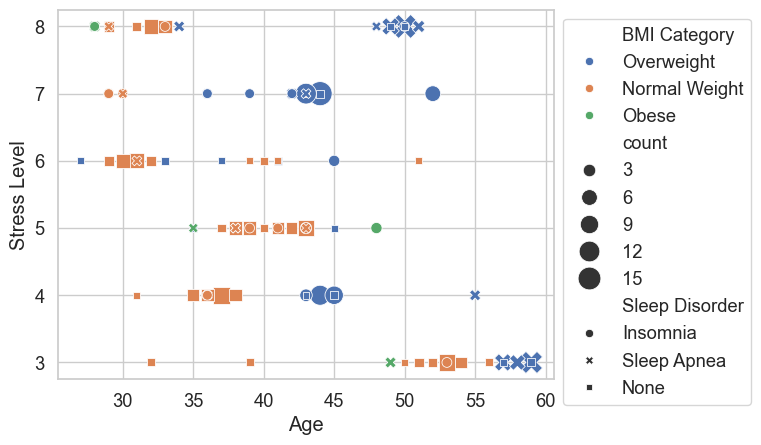

In [36]:
ax = show_scatter_plot(df, 'Age', 'Stress Level', 'BMI Category', 'Sleep Disorder')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

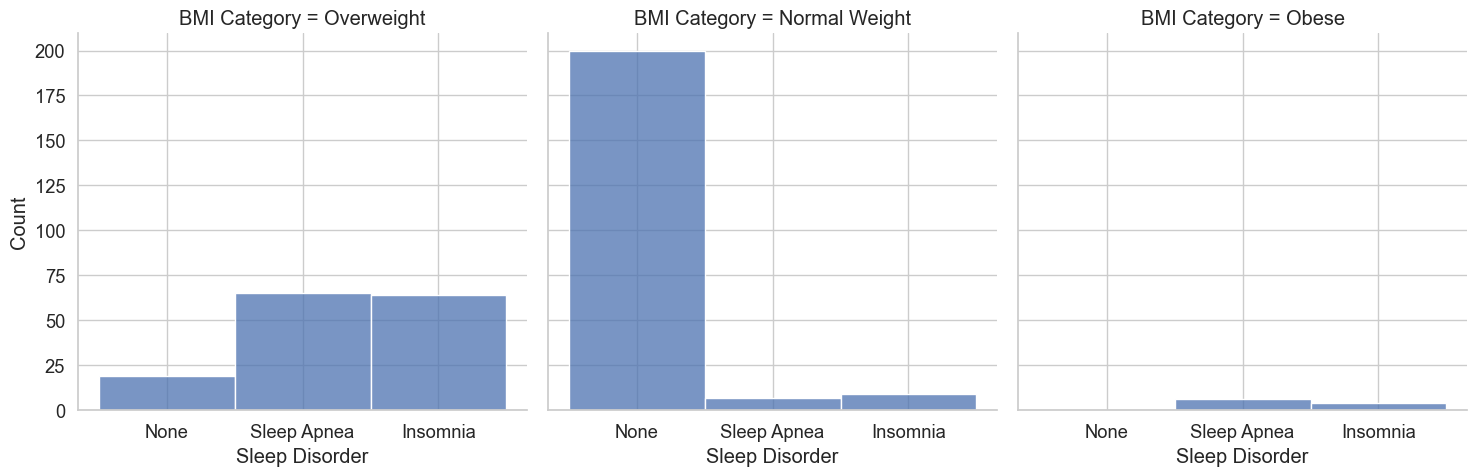

In [37]:
g = sns.FacetGrid(df, col="BMI Category", height=5)
g.map_dataframe(sns.histplot, x='Sleep Disorder')

Riassumendo:
- persone con BMI normale tendenzialmente non presentano sleep disorders
- lo stress non sembrerebbe influenzare i sleep disorders ma BMI sembrerebbe influenzarlo
- persone con overweight normale tendenzialmente presentano sleep disorders: sleep apnea e insomnia con una maggioranza del sleep apnea
- persone con obese normale presentano solo sleep disorders: sleep apnea e insomnia con una maggioranza del sleep apnea

## bmi and physical activity

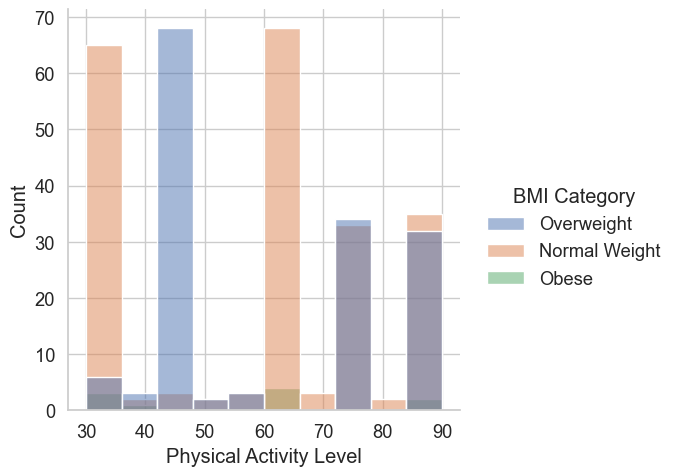

In [38]:
sns.displot(data=df, x='Physical Activity Level', hue='BMI Category')

Non ce correlazione tra attivita fisica e BMI pero si sa che non di dimagrisce istantaneamente ma ci vuole tempo ...

## Blood pressure, sleep disorders and BMI

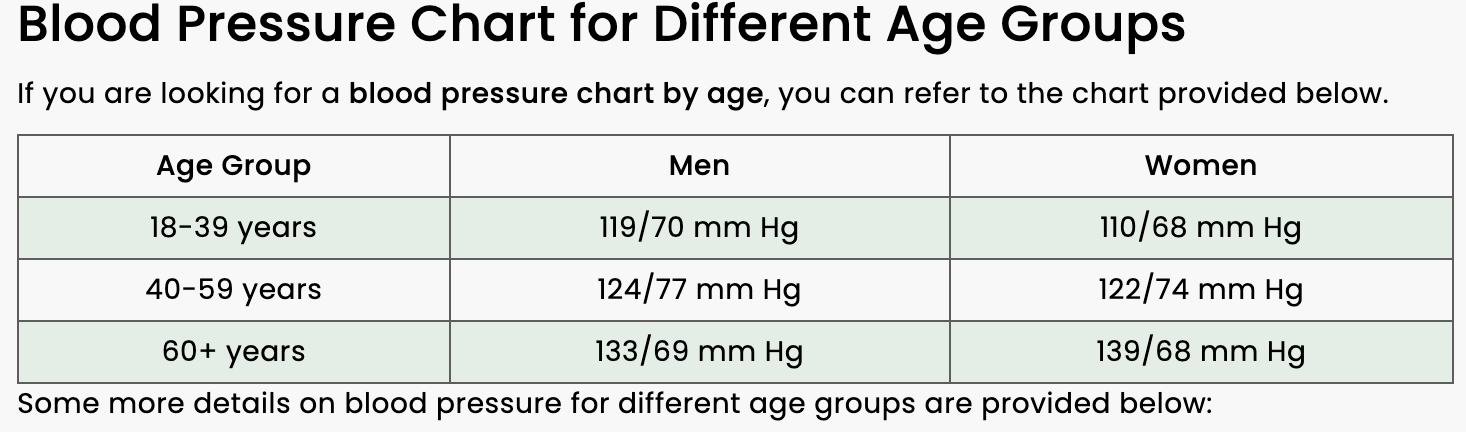
image by [metropolisindia](https://www.metropolisindia.com/blog/preventive-healthcare/understanding-blood-pressure-normal-range-and-age-related-chart#:~:text=Blood%20Pressure%20Chart%20for%20Different%20Age%20Groups)

### male

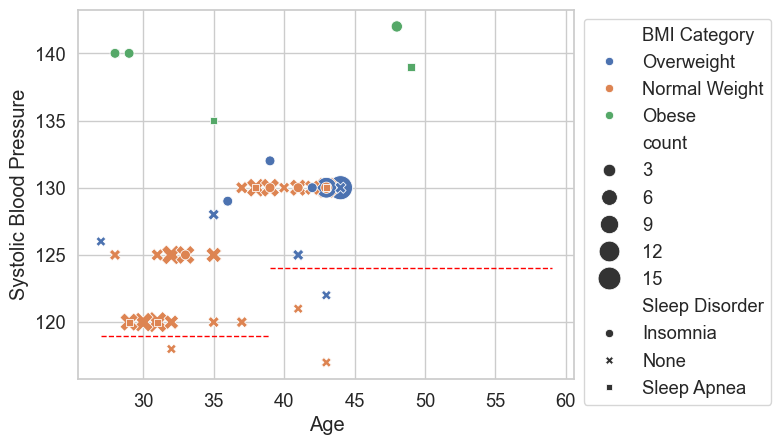

In [39]:
df_male = df[ df['Gender'] == 'Male' ]
ax = show_scatter_plot(df_male, 'Age', 'Systolic Blood Pressure', 'BMI Category', 'Sleep Disorder')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

line_args = {'color':'red', 'linestyle':'dashed', 'linewidth':1}

plt.plot([27, 39], [119, 119], **line_args)
plt.plot([39, 59], [124, 124], **line_args)

### female

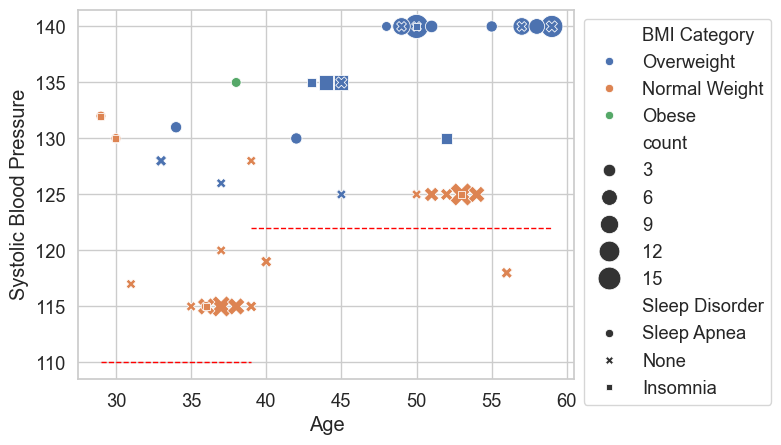

In [40]:
df_female = df[ df['Gender'] == 'Female' ]
ax = show_scatter_plot(df_female, 'Age', 'Systolic Blood Pressure', 'BMI Category', 'Sleep Disorder')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.plot([29, 39], [110, 110], **line_args)
plt.plot([39, 59], [122, 122], **line_args)

Se si guarda attentametne si potrà notare che le persone con IBM normali presentano sleep disorders. Non sarà che sia influenzato dallo stress?

### Distribuition of sleep disorders

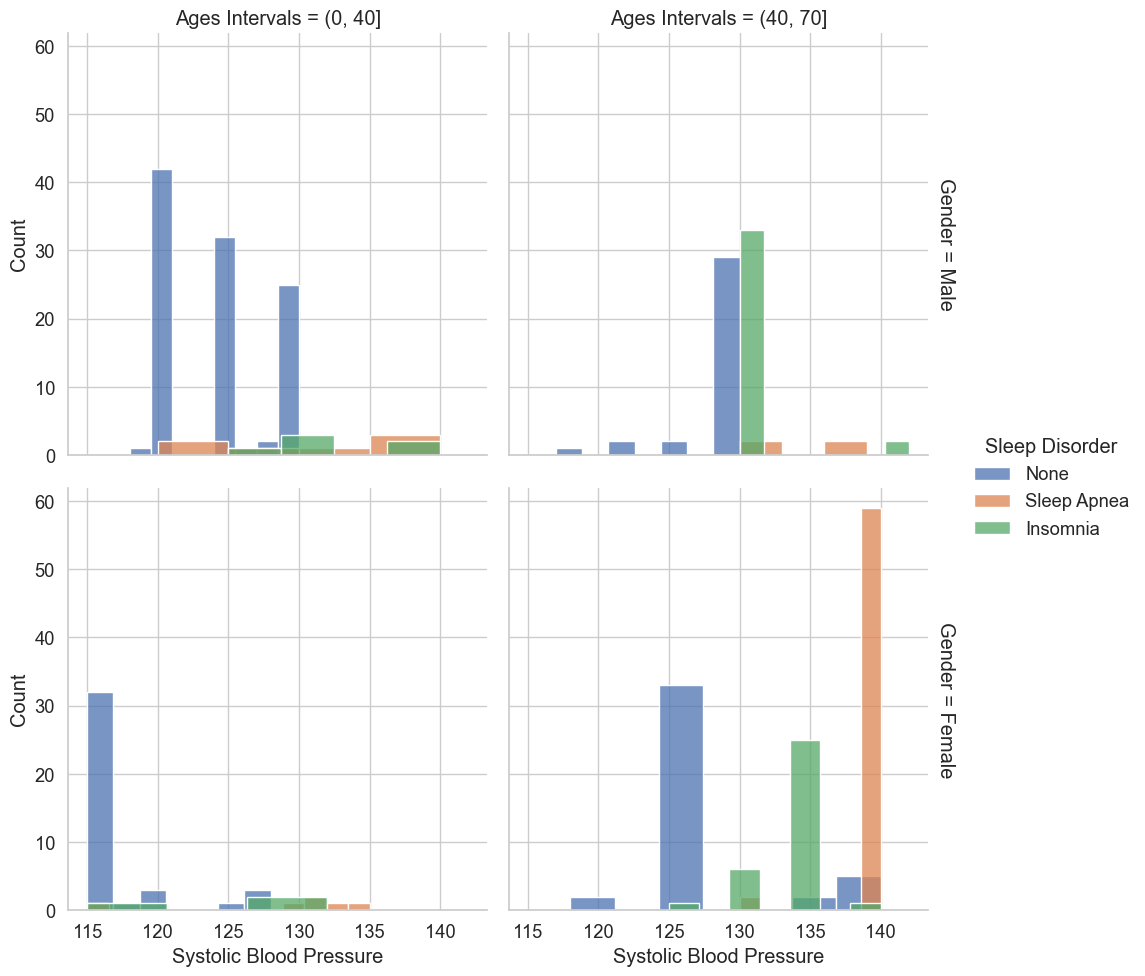

In [41]:
df_temp = df.copy()
df_temp['Ages Intervals'] = pd.cut(df['Age'], [0, 40, 70])
g = sns.FacetGrid(df_temp, col='Ages Intervals', row='Gender', hue='Sleep Disorder', margin_titles=True, height=5)
g.map(sns.histplot, 'Systolic Blood Pressure')
g.add_legend()

Come indicato prima chi presenta pressione alta presenta sleep disorders con una tendezza ad avere sleep apnea nel caso di pressione elevata mentre insomnia se presenta pressione media. Questa è una correlazione e non una casualità.
Non sembra esserci una forte relazione tra sleep disorder e blood pressure pero sembra che il blood pressure sia influenzato da altri aspetti oltre BMI
Come 

### Let's answer the question above

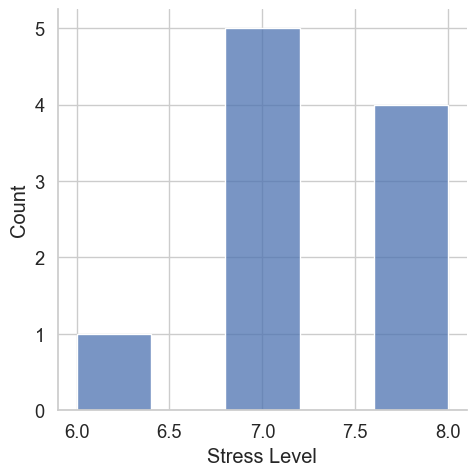

In [42]:
m1 = df['Age'] < 32
m2 = df['Sleep Disorder'] == 'Sleep Apnea'
m3 = df['Sleep Disorder'] == 'Insomnia'
df_under_30 = df[ m1 & (m2 | m3) ]
sns.displot(data=df_under_30, x='Stress Level')

We have found another variable that influence sleep disorders

## Stress level seems to have many repercusion on our healty life; is there something we can use to understand if we are stressed?

Overweight: pearson index = 0.8144828770075264, p value = 2.4414803953177133e-36
Normal Weight: pearson index = 0.803652411575927, p value = 3.9097832973006886e-50
Obese: pearson index = -0.21766071355693958, p value = 0.5457905697574961


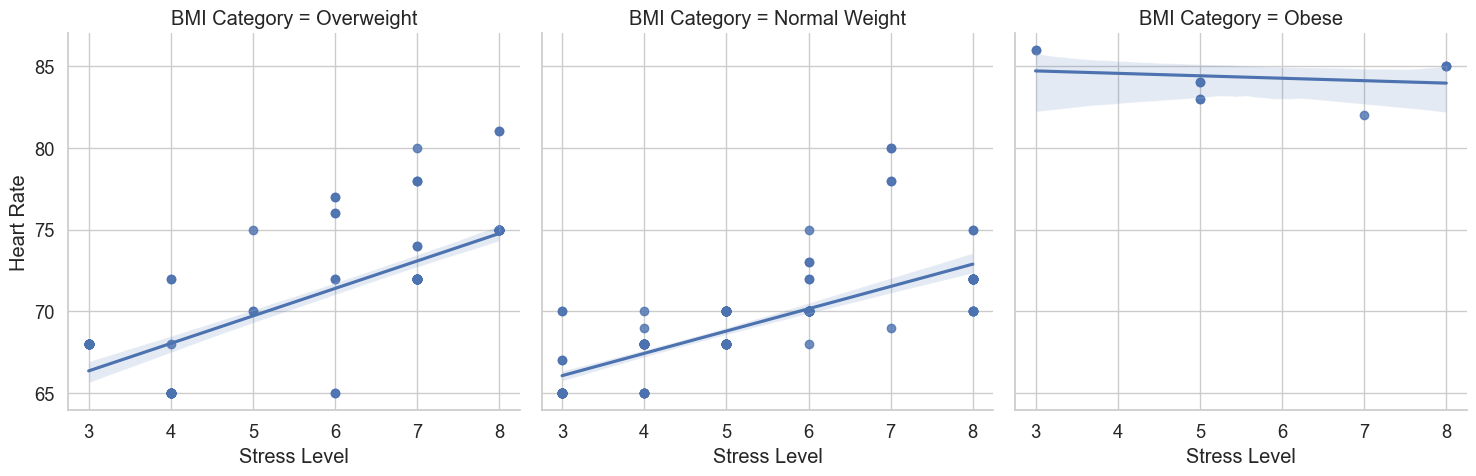

In [43]:
sns.lmplot(df, x='Stress Level', y='Heart Rate', col='BMI Category')

calculate_correlation(df, 'Stress Level', 'Heart Rate', 'BMI Category')

## Is there something that can we do to reduce the heart rate?

<Axes: xlabel='Physical Activity Level', ylabel='Heart Rate'>

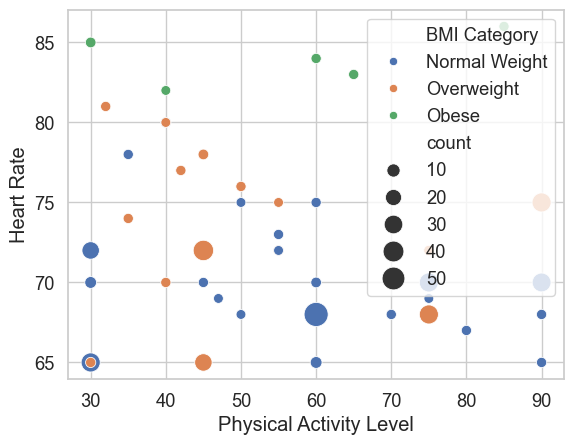

In [44]:
show_scatter_plot(df, 'Physical Activity Level', 'Heart Rate', 'BMI Category')

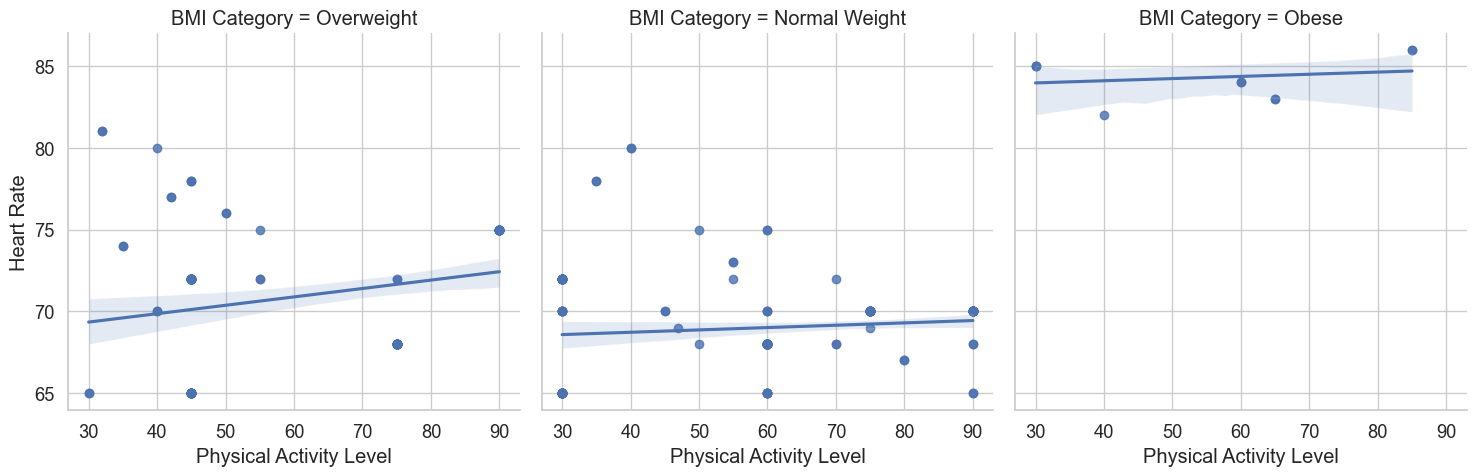

In [45]:
sns.lmplot(df, x='Physical Activity Level', y='Heart Rate', col='BMI Category')

### Can we do something more?

<Axes: xlabel='Daily Steps', ylabel='Heart Rate'>

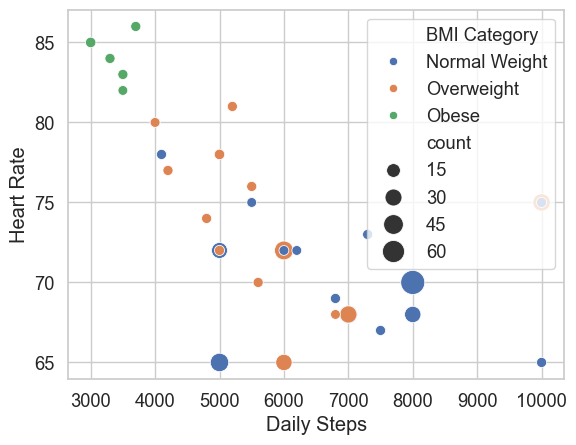

In [46]:
show_scatter_plot(df, 'Daily Steps', 'Heart Rate', 'BMI Category')

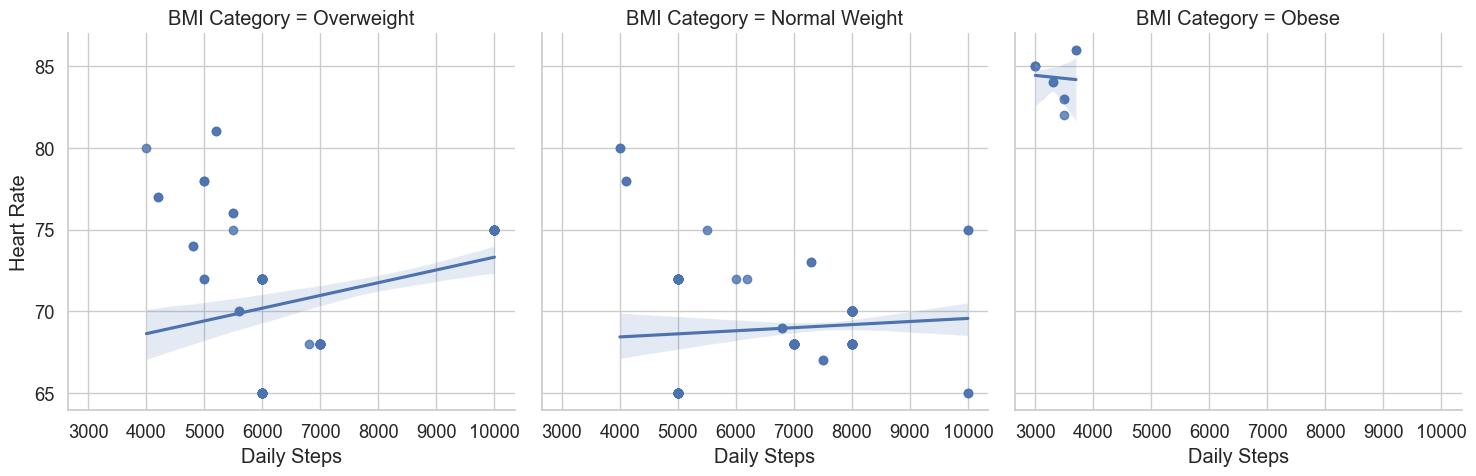

In [47]:
sns.lmplot(df, x='Daily Steps', y='Heart Rate', col='BMI Category')

Sembra che l'attività fisica non aiuti